In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split as tts
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error,confusion_matrix
scaler = pp.StandardScaler()
pca = PCA(n_components=2)
linear = LinearRegression()
logic = LogisticRegression(max_iter=1000,class_weight='balanced')

In [2]:
def haversine(coord1, coord2):
    R = 6371
    lat1, lon1 = map(float, coord1.strip("()").split(","))
    lat2, lon2 = map(float, coord2.strip("()").split(","))
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

In [3]:
df=pd.read_csv('Food_Delivery_Time_Prediction.csv')
df.dropna()
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


In [4]:
df_encoded = pd.get_dummies(df,columns=['Weather_Conditions','Traffic_Conditions','Vehicle_Type','Order_Priority'])
df_encoded.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Delivery_Person_Experience,Order_Time,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,...,Weather_Conditions_Sunny,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium,Vehicle_Type_Bicycle,Vehicle_Type_Bike,Vehicle_Type_Car,Order_Priority_High,Order_Priority_Low,Order_Priority_Medium
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,4,Afternoon,4.1,3.0,26.22,1321.10,...,False,False,False,True,False,False,True,False,False,True
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,8,Night,4.5,4.2,62.61,152.21,...,False,False,False,True,False,False,True,False,True,False
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,9,Night,3.3,3.4,48.43,1644.38,...,False,False,False,True,False,True,False,True,False,False
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,2,Evening,3.2,3.7,111.63,541.25,...,False,False,True,False,False,True,False,False,False,True
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,6,Night,3.5,2.8,32.38,619.81,...,False,True,False,False,False,True,False,False,True,False


In [5]:
columnsToScale = ['Distance','Delivery_Time','Order_Cost']
df_scaled = df_encoded.copy()
df_scaled[columnsToScale] = scaler.fit_transform(df_encoded[columnsToScale])
df_scaled.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Delivery_Person_Experience,Order_Time,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,...,Weather_Conditions_Sunny,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium,Vehicle_Type_Bicycle,Vehicle_Type_Bike,Vehicle_Type_Car,Order_Priority_High,Order_Priority_Low,Order_Priority_Medium
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",-1.454738,4,Afternoon,4.1,3.0,-1.487932,0.501852,...,False,False,False,True,False,False,True,False,False,True
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",1.439192,8,Night,4.5,4.2,-0.264987,-1.634294,...,False,False,False,True,False,False,True,False,True,False
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",-0.666417,9,Night,3.3,3.4,-0.741529,1.092646,...,False,False,False,True,False,True,False,True,False,False
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",0.335835,2,Evening,3.2,3.7,1.382411,-0.923323,...,False,False,True,False,False,True,False,False,False,True
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",-0.700119,6,Night,3.5,2.8,-1.280915,-0.779755,...,False,True,False,False,False,True,False,False,True,False


In [6]:
df_numeric = df_scaled.select_dtypes(include='number')
print(df_numeric.describe())
print()
print(df_numeric.median())
print()
print(df_numeric.mode().iloc[0])
print()
print(df_numeric.var())

           Distance  Delivery_Person_Experience  Restaurant_Rating  \
count  2.000000e+02                  200.000000         200.000000   
mean  -1.643130e-16                    5.250000           3.738500   
std    1.002509e+00                    2.745027           0.703021   
min   -1.608593e+00                    1.000000           2.500000   
25%   -7.924313e-01                    3.000000           3.200000   
50%   -1.806765e-01                    5.000000           3.800000   
75%    7.325599e-01                    8.000000           4.300000   
max    1.963762e+00                   10.000000           5.000000   

       Customer_Rating  Delivery_Time    Order_Cost  Tip_Amount  
count       200.000000   2.000000e+02  2.000000e+02  200.000000  
mean          3.686500   3.730349e-16 -2.042810e-16   46.616650  
std           0.697063   1.002509e+00  1.002509e+00   29.361706  
min           2.600000  -1.857269e+00 -1.688954e+00    1.240000  
25%           3.100000  -7.896704e-01 -

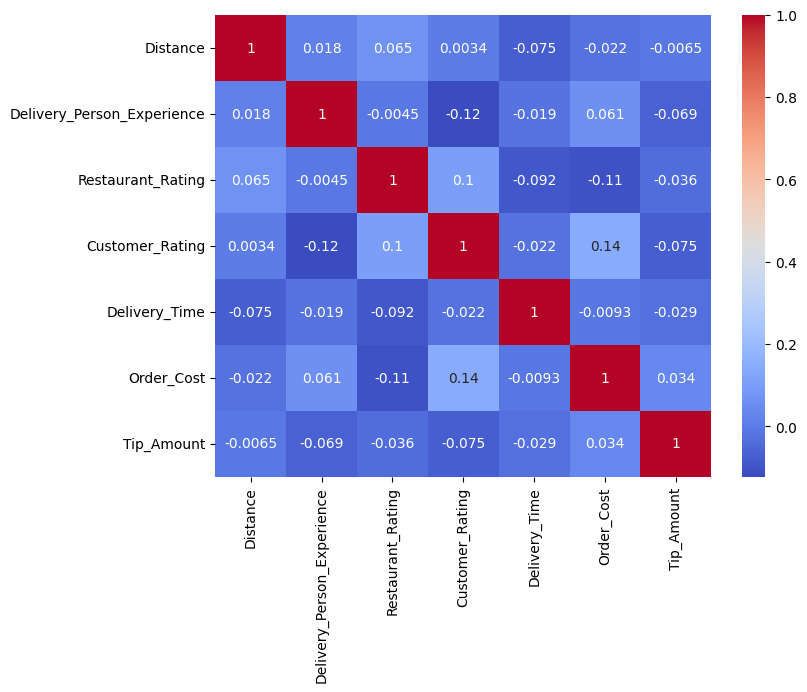

In [7]:
gr = df_numeric.corr()
plt.figure(figsize=(8,6))
sb.heatmap(gr,annot=True,cmap='coolwarm')
plt.show()

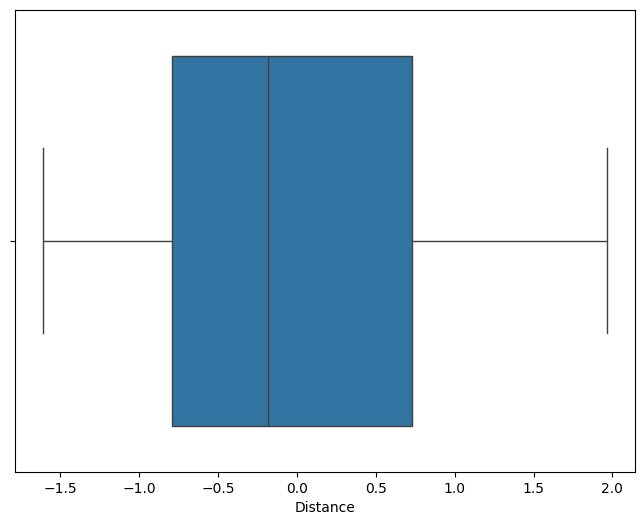

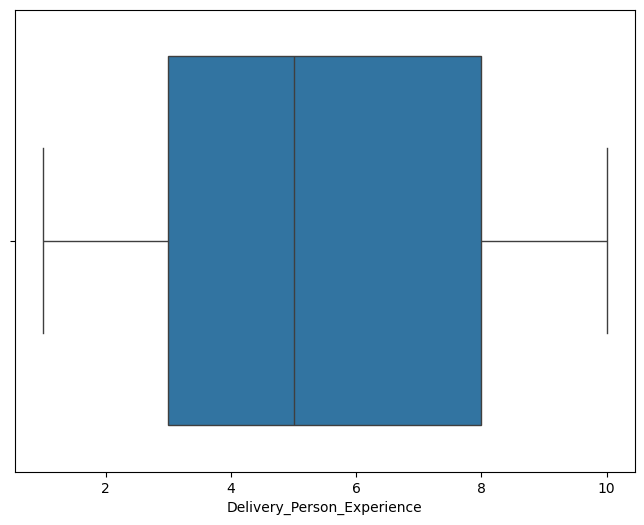

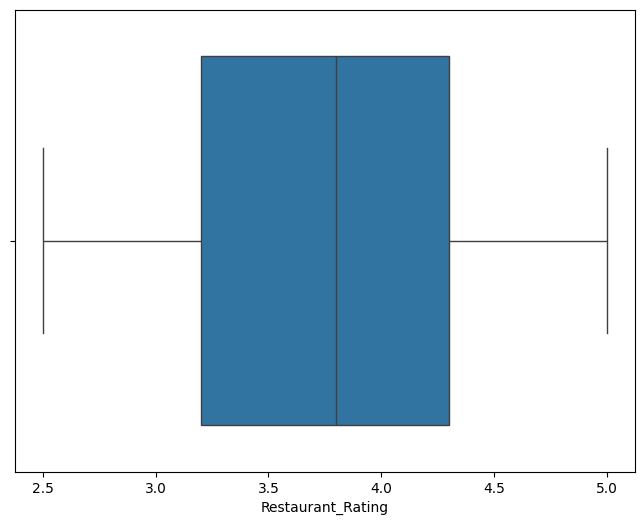

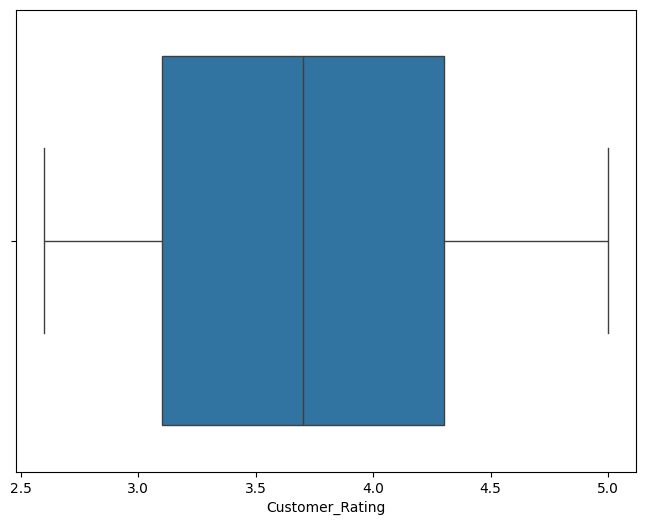

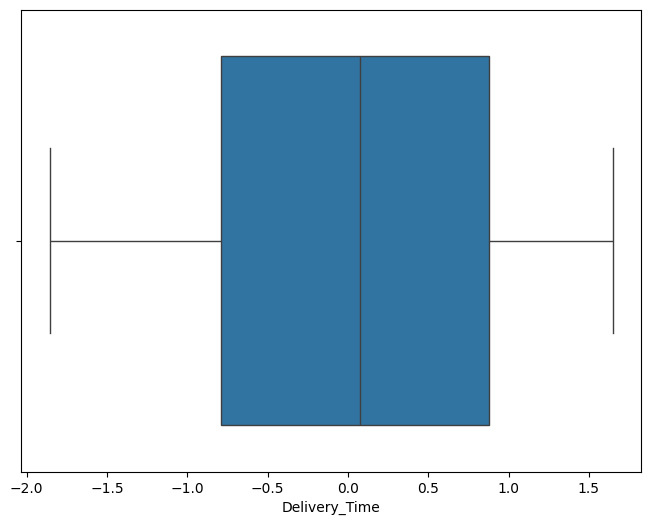

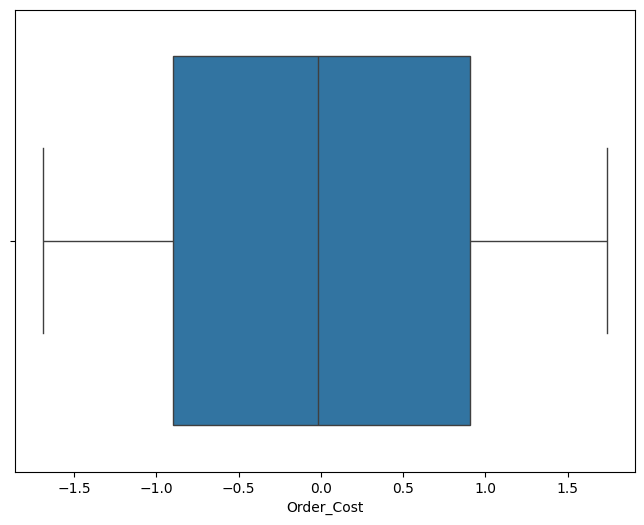

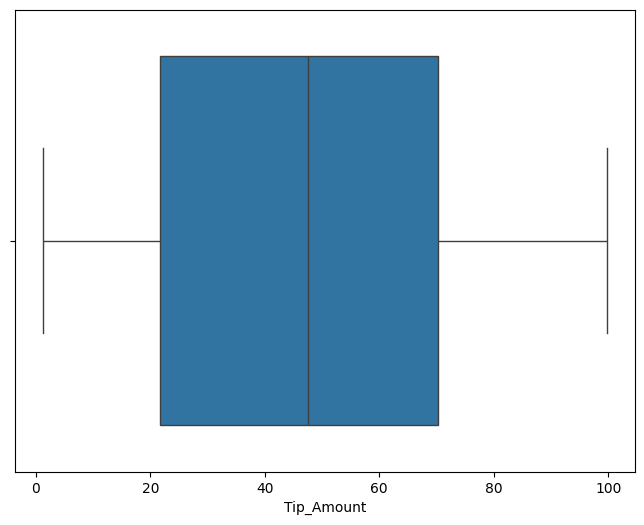

In [8]:
for col in df_numeric.columns:
    plt.figure(figsize=(8,6))
    sb.boxplot(x = df_numeric[col])
    plt.show()

In [9]:
df_scaled['Distance'] = df_scaled.apply(lambda row: haversine(row['Customer_Location'], row['Restaurant_Location']),axis=1)
rush_hours = ['Morning', 'Evening']
df_scaled['Is_Rush_Hour'] = df_scaled['Order_Time'].isin(rush_hours).astype(bool)
df_scaled.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Delivery_Person_Experience,Order_Time,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,...,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium,Vehicle_Type_Bicycle,Vehicle_Type_Bike,Vehicle_Type_Car,Order_Priority_High,Order_Priority_Low,Order_Priority_Medium,Is_Rush_Hour
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",775.651198,4,Afternoon,4.1,3.0,-1.487932,0.501852,...,False,False,True,False,False,True,False,False,True,False
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",1042.385597,8,Night,4.5,4.2,-0.264987,-1.634294,...,False,False,True,False,False,True,False,True,False,False
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",476.220706,9,Night,3.3,3.4,-0.741529,1.092646,...,False,False,True,False,True,False,True,False,False,False
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",389.912629,2,Evening,3.2,3.7,1.382411,-0.923323,...,False,True,False,False,True,False,False,False,True,True
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",806.505886,6,Night,3.5,2.8,-1.280915,-0.779755,...,True,False,False,False,True,False,False,True,False,False


In [10]:
x = df_scaled[['Distance','Traffic_Conditions_High','Traffic_Conditions_Low','Traffic_Conditions_Medium','Order_Priority_Low','Order_Priority_High','Order_Priority_Medium']]
y = df_scaled['Delivery_Time']
x_train,x_test,y_train,y_test = tts(x,y,test_size=0.2,random_state=42)
linear.fit(x_train,y_train)
y_pred = linear.predict(x_test)

In [11]:
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.97047040913518
0.8305535989541764
0.07094494659171258


In [12]:
df_scaled['Delivery_Status'] = df_scaled['Delivery_Time'].apply(lambda x: 'Fast' if x <= df_scaled['Delivery_Time'].quantile(0.75) else 'Delayed')
df_scaled['Delivery_Status'] = df_scaled['Delivery_Status'].map({'Fast': 0, 'Delayed': 1})

In [13]:
x = pd.get_dummies(df[['Traffic_Conditions','Weather_Conditions','Order_Priority']],drop_first=True).merge(df_scaled[['Distance','Delivery_Person_Experience','Is_Rush_Hour']],left_index=True,right_index=True)
y = df_scaled['Delivery_Status']
x_train,x_test,y_train,y_test = tts(x,y,test_size=0.2,random_state=42)
logic.fit(x_train,y_train)
y_pred = logic.predict(x_test)

In [14]:
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.5
0.16666666666666666
0.375
0.23076923076923078
[[17 15]
 [ 5  3]]


In this model, Linear regression is used to find the delivery time using distance, traffic and Order Priority & Logistic regression is used to find the delivery status using Distance, Delivery Person Experience, Order Time, Traffic, Weather and Order Priority. The scores achieved by both models given below;

## Linear Regression
1. MSE: 0.97047040913518
2. MAE: 0.8305535989541764
3. R2: 0.07094494659171258

## Logistic Regression
1. Accuracy Score: 0.5
2. Precision Score: 0.16666666666666666
3. Recall Score: 0.375
4. F1 Score: 0.23076923076923078

In my model, linear regression has better precision than logistic regression. Key insight is longer distance, rush hour, and traffic leading to delivery delay. Based on these findings, we can include better routes for less distance and traffic. Including frequent training session for beginner delivery people can improve delivery delays.